In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json


In [38]:
#create a dataframe from a file using pandas
file = '../Resources/Capitals.csv'
# The correct encoding must be used to read the CSV in pandas
weather = pd.read_csv(file, encoding="ISO-8859-1")
weather.reset_index(inplace=True)
weather.columns

Index(['index', 'Country', 'Cities', 'Country Code'], dtype='object')

In [41]:
# set up additional columns to hold information
weather['Temperature'] = ""

base_url = "http://api.openweathermap.org/data/2.5/weather?"

print(response['main']['temp'])
# use iterrows to iterate through pandas dataframe
for index, row in weather.iterrows():

    # iterate thru each row of the file
    city = row['Cities']
    url = base_url + "appid=" + "082ff2cde1d396b2b896b2335daad199" + "&q=" + city +"&units=imperial"

# assemble url and make API request
    response = requests.get(url).json()
  
    #update the dataframe 
    try:
        weather.loc[index, 'Temperature'] = response['main']['temp']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

64.69
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.


In [43]:
weather.head()

,index,Country,Cities,Country Code,Temperature
0,0,Afghanistan,Kabul,AF,55.4
1,1,Albania,Tirana (Tirane),AL,
2,2,Algeria,Algiers,DZ,78.64
3,3,Andorra,Andorra la Vella,AD,39.76
4,4,Angola,Luanda,AO,77


In [44]:
weather.to_csv('../Outputs/WeatherbyCity.csv')

In [45]:
happiness = '../Resources/WorldHappinessReport.csv'
happinessReport = pd.read_csv(happiness)

happinessnew = happinessReport[['country', 'year', 'Life Ladder']].copy()
happinessnew.head()

,country,year,Life Ladder
0,Afghanistan,2008,3.723590
1,Afghanistan,2009,4.401778
2,Afghanistan,2010,4.758381
3,Afghanistan,2011,3.831719
4,Afghanistan,2012,3.782938


In [56]:
happinessnew_2017 = happinessnew[happinessnew['year']== 2017]
happinessnew_2017 = happinessnew_2017.rename(columns={'country': 'Country'})
happinessnew_2017.head()


,Country,year,Life Ladder
9,Afghanistan,2017,2.661718
19,Albania,2017,4.639548
25,Algeria,2017,5.248912
41,Argentina,2017,6.039330
53,Armenia,2017,4.287736


In [68]:
DF=pd.merge(weather, happinessnew_2017, on="Country", how='inner',suffixes=("","") )
DF['Temperature'] = pd.to_numeric(DF['Temperature'],errors='coerce')
DF.head()

,index,Country,Cities,Country Code,Temperature,year,Life Ladder
0,0,Afghanistan,Kabul,AF,55.40,2017,2.661718
1,1,Albania,Tirana (Tirane),AL,NaN,2017,4.639548
2,2,Algeria,Algiers,DZ,78.64,2017,5.248912
3,6,Argentina,Buenos Aires,AR,75.83,2017,6.039330
4,7,Armenia,Yerevan,AM,50.00,2017,4.287736


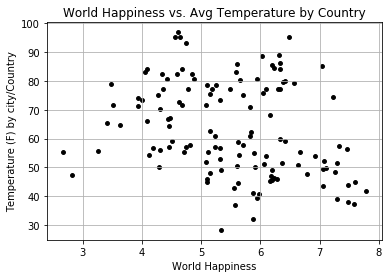

In [72]:
plt.scatter(DF["Life Ladder"], DF["Temperature"], c="black", marker="o", s=15)

plt.title("World Happiness vs. Avg Temperature by Country")
plt.ylabel("Temperature (F) by city/Country")
plt.xlabel("World Happiness")
plt.grid(True)